In [5]:
import FileHandler
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

with open(FileHandler.MIDILABS_RESULTS_PATHS['bar'], 'r') as read_file:
    all_results_bar = read_file.readlines()
with open(FileHandler.MIDILABS_RESULTS_PATHS['beat'], 'r') as read_file:
    all_results_beat = read_file.readlines()
    
songs = dict()
durations = dict()
    
for row_nr in range(len(all_results_bar)):
    row_content_bar = all_results_bar[row_nr].rstrip().split(';')
    row_content_beat = all_results_beat[row_nr].rstrip().split(';')
    if float(row_content_bar[3]) < 0.85:
        song_key = int(row_content_bar[0])
        if song_key in songs:
            songs[song_key].append([float(row_content_beat[4]), float(row_content_bar[4]), 
                                    float(row_content_beat[5]), float(row_content_bar[5]),
                                    float(row_content_beat[6]), float(row_content_bar[6]),
                                    float(row_content_beat[7]), float(row_content_bar[7]),
                                    float(row_content_beat[8]), float(row_content_bar[8])])
        else:
            songs[song_key] = [[float(row_content_beat[4]), float(row_content_bar[4]), 
                                float(row_content_beat[5]), float(row_content_bar[5]),
                                float(row_content_beat[6]), float(row_content_bar[6]),
                                float(row_content_beat[7]), float(row_content_bar[7]),
                                float(row_content_beat[8]), float(row_content_bar[8])]]
            durations[song_key] = float(row_content_beat[1])

# nomidi = set()
# for row_nr in range(len(all_results)):
#     row_content = all_results[row_nr].rstrip().split(';')
#     if int(row_content[0]) not in songs:
#         nomidi.add(int(row_content[0]))
# print nomidi

In [6]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

Beat: (0.4813564655277135, 4.147622592913858e-34)
Bar: (0.5979819477647743, 4.456968809930503e-56)


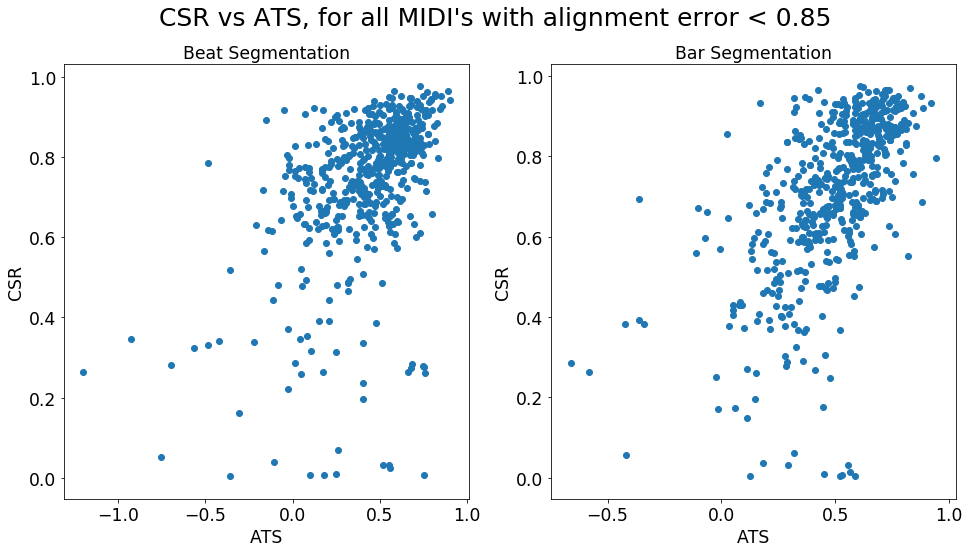

In [7]:
all_est_beat = []
all_est_bar = []
all_csr_beat = []
all_csr_bar = []
all_ovs_beat= []
all_ovs_bar = []
all_uns_beat = []
all_uns_bar = []
all_seg_beat = []
all_seg_bar = []
for song_key in songs:
    for midi in songs[song_key]:
        all_est_beat.append(midi[0])
        all_csr_beat.append(midi[2])
        all_est_bar.append(midi[1])
        all_csr_bar.append(midi[3])
        all_ovs_beat.append(midi[4])
        all_ovs_bar.append(midi[5])
        all_uns_beat.append(midi[6])
        all_uns_bar.append(midi[7])
        all_seg_beat.append(midi[8])
        all_seg_bar.append(midi[9])
        
print 'Beat: ' + str(ss.pearsonr(all_est_beat, all_csr_beat))
print 'Bar: ' + str(ss.pearsonr(all_est_bar, all_csr_bar))

fig, axes = plt.subplots(ncols=2, figsize=(16,8))
# plt.figure(figsize=(10,10))
axes[0].scatter(all_est_beat, all_csr_beat)
axes[1].scatter(all_est_bar, all_csr_bar)
fig.suptitle('CSR vs ATS, for all MIDI\'s with alignment error < 0.85', fontsize=25)
axes[0].set_title('Beat Segmentation')
axes[0].set_xlabel('ATS')
axes[0].set_ylabel('CSR')
axes[1].set_title('Bar Segmentation')
axes[1].set_xlabel('ATS')
axes[1].set_ylabel('CSR')
plt.savefig('/media/daphne/Seagate Expansion Drive/Data/Results/Figures/CSRvsATS')

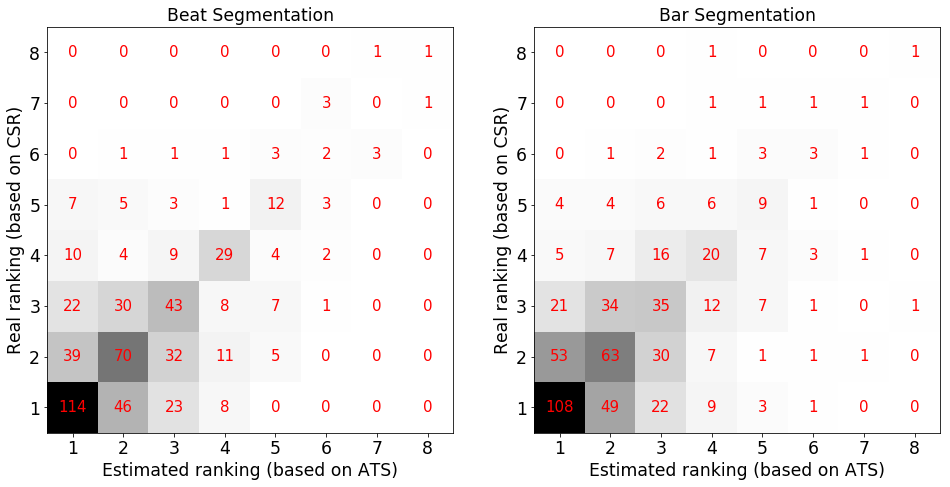

In [8]:
import scipy.stats as ss

all_est_beat = []
all_csr_beat = []
all_est_bar = []
all_csr_bar = []
        
for song_key in songs:
    est_ranking_beat = ss.rankdata([x[0] for x in songs[song_key]])
    csr_ranking_beat = ss.rankdata([x[2] for x in songs[song_key]])
    est_ranking_bar = ss.rankdata([x[1] for x in songs[song_key]])
    csr_ranking_bar = ss.rankdata([x[3] for x in songs[song_key]])
    for midi in range(len(songs[song_key])):
        all_est_beat.append(int(est_ranking_beat[midi]))
        all_csr_beat.append(int(csr_ranking_beat[midi]))
        all_est_bar.append(int(est_ranking_bar[midi]))
        all_csr_bar.append(int(csr_ranking_bar[midi]))
        
matrix_beat = np.zeros((np.max(all_est_beat) + 1, np.max(all_csr_beat) + 1), dtype=int)
matrix_bar = np.zeros((np.max(all_est_bar) + 1, np.max(all_csr_bar) + 1), dtype=int)
for i in range(len(all_est_beat)):
    matrix_beat[all_est_beat[i], all_csr_beat[i]] += 1
for i in range(len(all_est_bar)):
    matrix_bar[all_est_bar[i], all_csr_bar[i]] += 1

    
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
ax[0].imshow(matrix_beat[1:,1:], cmap='Greys', interpolation='nearest', origin='lower')
ax[1].imshow(matrix_bar[1:,1:], cmap='Greys', interpolation='nearest', origin='lower')

ax[0].set_xticks(range(np.max(all_est_beat)))
ax[0].set_yticks(range(np.max(all_csr_beat)))
ax[0].set_xticklabels(range(1, np.max(all_est_beat) + 1))
ax[0].set_yticklabels(range(1, np.max(all_csr_beat) + 1))
for i in range(1, np.max(all_est_beat) + 1):
    for j in range(1, np.max(all_csr_beat) + 1):
        text = ax[0].text(j - 1, i - 1, matrix_beat[i, j],
                       ha="center", va="center", color="r", fontsize=15)
ax[0].set_xlabel('Estimated ranking (based on ATS)')
ax[0].set_ylabel('Real ranking (based on CSR)')
ax[0].set_title('Beat Segmentation')

ax[1].set_xticks(range(np.max(all_est_bar)))
ax[1].set_yticks(range(np.max(all_csr_bar)))
ax[1].set_xticklabels(range(1, np.max(all_est_bar) + 1))
ax[1].set_yticklabels(range(1, np.max(all_csr_bar) + 1))
for i in range(1, np.max(all_est_bar) + 1):
    for j in range(1, np.max(all_csr_bar) + 1):
        text = ax[1].text(j - 1, i - 1, matrix_bar[i, j],
                       ha="center", va="center", color="r", fontsize=15)
ax[1].set_xlabel('Estimated ranking (based on ATS)')
ax[1].set_ylabel('Real ranking (based on CSR)')
ax[1].set_title('Bar Segmentation')


plt.savefig('/media/daphne/Seagate Expansion Drive/Data/Results/Figures/csv-ats-ranking')

In [9]:
all_est_beat = []
all_csr_beat = []
differences_beat = []
all_est_bar = []
all_csr_bar = []
differences_bar = []
        
for song_key in songs:
    best_csr_i_beat = np.argmax([x[2] for x in songs[song_key]])
    best_est_i_beat = np.argmax([x[0] for x in songs[song_key]])
    csr_best_csr_beat = songs[song_key][best_csr_i_beat][2]
    csr_best_est_beat = songs[song_key][best_est_i_beat][2]
    all_est_beat.append(csr_best_est_beat)
    all_csr_beat.append(csr_best_csr_beat)
    differences_beat.append(csr_best_csr_beat - csr_best_est_beat)
    if csr_best_csr_beat - csr_best_est_beat > 0.5:
        print song_key
        
    best_csr_i_bar = np.argmax([x[3] for x in songs[song_key]])
    best_est_i_bar = np.argmax([x[1] for x in songs[song_key]])
    csr_best_csr_bar = songs[song_key][best_csr_i_bar][3]
    csr_best_est_bar = songs[song_key][best_est_i_bar][3]
    all_est_bar.append(csr_best_est_bar)
    all_csr_bar.append(csr_best_csr_bar)
    differences_bar.append(csr_best_csr_bar - csr_best_est_bar)
    if csr_best_csr_bar - csr_best_est_bar > 0.5:
        print song_key

106
106
107
176


(0.7927704062203634, 1.6804586611936977e-42)
(0.9135884769726935, 8.762828471337059e-76)


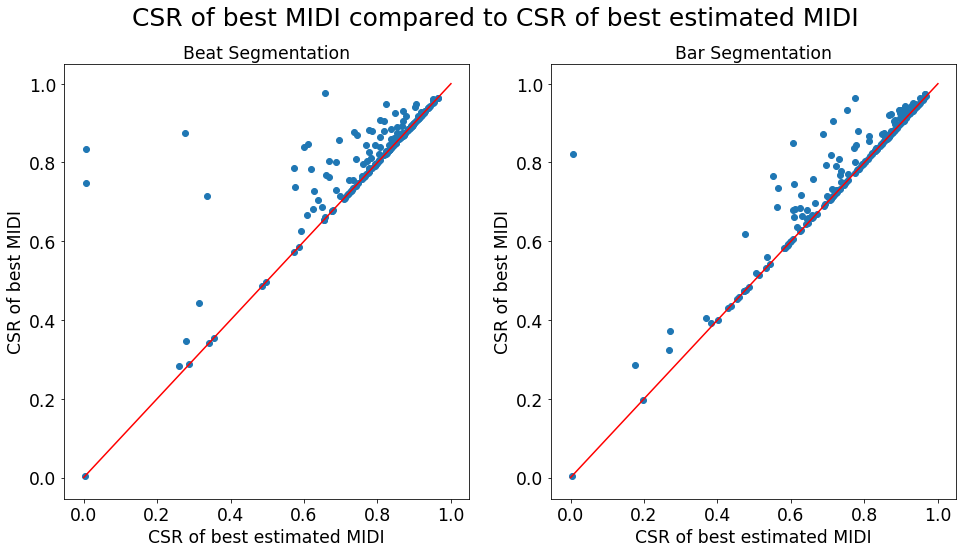

In [10]:
print ss.pearsonr(all_est_beat, all_csr_beat)
print ss.pearsonr(all_est_bar, all_csr_bar)

fig, ax = plt.subplots(ncols=2, figsize=(16,8))
ax[0].plot([0,1],[0,1], c='red')
ax[0].scatter(all_est_beat, all_csr_beat)
ax[0].set_title('Beat Segmentation')
ax[0].set_xlabel('CSR of best estimated MIDI')
ax[0].set_ylabel('CSR of best MIDI')

ax[1].plot([0,1],[0,1], c='red')
ax[1].scatter(all_est_bar, all_csr_bar)
ax[1].set_title('Bar Segmentation')
ax[1].set_xlabel('CSR of best estimated MIDI')
ax[1].set_ylabel('CSR of best MIDI')

fig.suptitle('CSR of best MIDI compared to CSR of best estimated MIDI', fontsize=25)
plt.savefig('/media/daphne/Seagate Expansion Drive/Data/Results/Figures/csr-ats-diff')

In [90]:
# WCSR of all / best / estimated best
all_indices = []
best_est_beat_indices = []
best_est_bar_indices = []
best_csr_beat_indices = []
best_csr_bar_indices = []

for song_key in songs:
    midis = songs[song_key]
    for midi_i in range(len(midis)):
        all_indices.append([song_key, midi_i])
    best_est_beat_indices.append([song_key, np.argmax([x[0] for x in midis])])
    best_est_bar_indices.append([song_key, np.argmax([x[1] for x in midis])])
    best_csr_beat_indices.append([song_key, np.argmax([x[2] for x in midis])])
    best_csr_bar_indices.append([song_key, np.argmax([x[3] for x in midis])])
    
total_duration = sum(durations.values())

wcsr_beat_all = sum([songs[i[0]][i[1]][2] * durations[i[0]] for i in all_indices]) / sum([durations[i[0]] for i in all_indices])
wcsr_bar_all = sum([songs[i[0]][i[1]][3] * durations[i[0]] for i in all_indices]) / sum([durations[i[0]] for i in all_indices])
ovs_beat_all = sum([songs[i[0]][i[1]][4] * durations[i[0]] for i in all_indices]) / sum([durations[i[0]] for i in all_indices])
ovs_bar_all = sum([songs[i[0]][i[1]][5] * durations[i[0]] for i in all_indices]) / sum([durations[i[0]] for i in all_indices])
uns_beat_all = sum([songs[i[0]][i[1]][6] * durations[i[0]] for i in all_indices]) / sum([durations[i[0]] for i in all_indices])
uns_bar_all = sum([songs[i[0]][i[1]][7] * durations[i[0]] for i in all_indices]) / sum([durations[i[0]] for i in all_indices])
seg_beat_all = sum([songs[i[0]][i[1]][8] * durations[i[0]] for i in all_indices]) / sum([durations[i[0]] for i in all_indices])
seg_bar_all = sum([songs[i[0]][i[1]][9] * durations[i[0]] for i in all_indices]) / sum([durations[i[0]] for i in all_indices])

print wcsr_beat_all, wcsr_bar_all, ovs_beat_all, ovs_bar_all, uns_beat_all, uns_bar_all, seg_beat_all, seg_bar_all

wcsr_beat_est = sum([songs[i[0]][i[1]][2] * durations[i[0]] for i in best_est_beat_indices]) / sum([durations[i[0]] for i in best_est_beat_indices])
wcsr_bar_est = sum([songs[i[0]][i[1]][3] * durations[i[0]] for i in best_est_bar_indices]) / sum([durations[i[0]] for i in best_est_bar_indices])
ovs_beat_est = sum([songs[i[0]][i[1]][4] * durations[i[0]] for i in best_est_beat_indices]) / sum([durations[i[0]] for i in best_est_beat_indices])
ovs_bar_est = sum([songs[i[0]][i[1]][5] * durations[i[0]] for i in best_est_bar_indices]) / sum([durations[i[0]] for i in best_est_bar_indices])
uns_beat_est = sum([songs[i[0]][i[1]][6] * durations[i[0]] for i in best_est_beat_indices]) / sum([durations[i[0]] for i in best_est_beat_indices])
uns_bar_est = sum([songs[i[0]][i[1]][7] * durations[i[0]] for i in best_est_bar_indices]) / sum([durations[i[0]] for i in best_est_bar_indices])
seg_beat_est = sum([songs[i[0]][i[1]][8] * durations[i[0]] for i in best_est_beat_indices]) / sum([durations[i[0]] for i in best_est_beat_indices])
seg_bar_est = sum([songs[i[0]][i[1]][9] * durations[i[0]] for i in best_est_bar_indices]) / sum([durations[i[0]] for i in best_est_bar_indices])

print wcsr_beat_est, wcsr_bar_est, ovs_beat_est, ovs_bar_est, uns_beat_est, uns_bar_est, seg_beat_est, seg_bar_est

wcsr_beat_csr = sum([songs[i[0]][i[1]][2] * durations[i[0]] for i in best_csr_beat_indices]) / sum([durations[i[0]] for i in best_csr_beat_indices])
wcsr_bar_csr = sum([songs[i[0]][i[1]][3] * durations[i[0]] for i in best_csr_bar_indices]) / sum([durations[i[0]] for i in best_csr_bar_indices])
ovs_beat_csr = sum([songs[i[0]][i[1]][4] * durations[i[0]] for i in best_csr_beat_indices]) / sum([durations[i[0]] for i in best_csr_beat_indices])
ovs_bar_csr = sum([songs[i[0]][i[1]][5] * durations[i[0]] for i in best_csr_bar_indices]) / sum([durations[i[0]] for i in best_csr_bar_indices])
uns_beat_csr = sum([songs[i[0]][i[1]][6] * durations[i[0]] for i in best_csr_beat_indices]) / sum([durations[i[0]] for i in best_csr_beat_indices])
uns_bar_csr = sum([songs[i[0]][i[1]][7] * durations[i[0]] for i in best_csr_bar_indices]) / sum([durations[i[0]] for i in best_csr_bar_indices])
seg_beat_csr = sum([songs[i[0]][i[1]][8] * durations[i[0]] for i in best_csr_beat_indices]) / sum([durations[i[0]] for i in best_csr_beat_indices])
seg_bar_csr = sum([songs[i[0]][i[1]][9] * durations[i[0]] for i in best_csr_bar_indices]) / sum([durations[i[0]] for i in best_csr_bar_indices])

print wcsr_beat_csr, wcsr_bar_csr, ovs_beat_csr, ovs_bar_csr, uns_beat_csr, uns_bar_csr, seg_beat_csr, seg_bar_csr

0.725393756692 0.691715828441 0.803132297896 0.93093908916 0.866483742826 0.709497039931 0.768859871157 0.703353884158
0.7574343534 0.728812075326 0.812947245858 0.932491151742 0.871866198193 0.733221195671 0.775618793268 0.724915604195
0.795497059344 0.75518177687 0.825541657214 0.93680016677 0.880054381425 0.733701918567 0.794041231925 0.72519137741
